# Gaussian Mixture Model (GMM):

**What is a Gaussian Mixture Model (GMM)?**

**A Gaussian Mixture Model is a statistical model used to group data into clusters. It assumes that the data comes from multiple Gaussian distributions (also called normal distributions) that are combined together.**

Think of it as a soft clustering technique where each data point can belong to multiple clusters with different probabilities, unlike K-Means, where a point belongs to only one cluster.

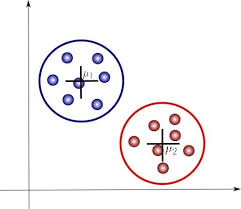

# Why is GMM Used?

**GMM is used when:**

**Clusters have different shapes and sizes:** GMM can find clusters that are elliptical, circular, or any other shape, while K-Means can only handle spherical clusters.

**Soft clustering is needed:** It provides a probability of belonging to each cluster, which is helpful in certain scenarios like recommendation systems or customer segmentation.

**Flexible clustering:** It works well for overlapping clusters, where data points might not strictly belong to one cluster.

# How Does GMM Work?

**1) Assume Gaussian Distributions:** It assumes that the data is generated from a mix of Gaussian distributions.

**2) Identify Parameters:** Each Gaussian distribution is characterized by:

Mean: Where the center of the cluster is.

Variance/Covariance: How spread out the cluster is.

**3) Expectation-Maximization (EM):**

Expectation step: Calculate the probability that each point belongs to a specific Gaussian (soft assignment to clusters).

Maximization step: Adjust the parameters (mean, variance, weights) of each Gaussian to better fit the data.

**4) Repeat** until the parameters stabilize or the clusters stop changing significantly.

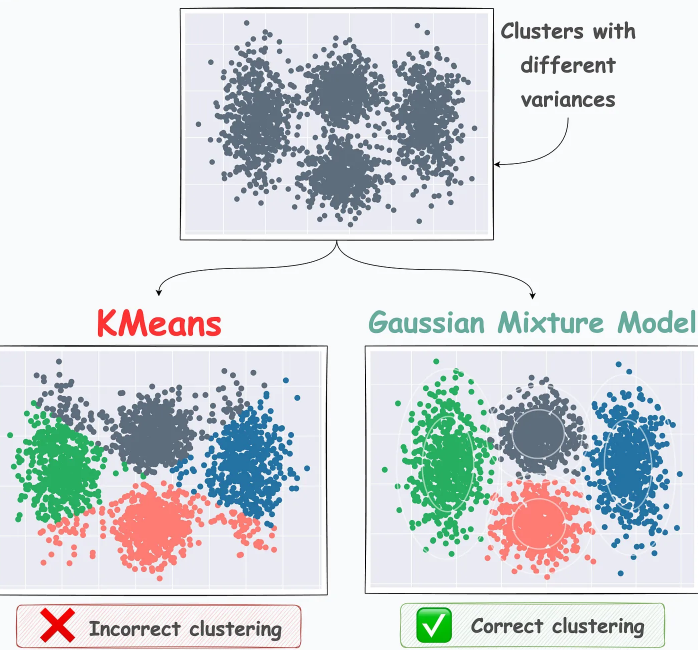

# Advantages of GMM Over K-Means

1) Soft Clustering: GMM gives probabilities instead of hard assignments, which is more realistic for overlapping clusters.

2) Handles Complex Shapes: It can model elliptical or irregularly shaped clusters, unlike K-Means, which assumes spherical clusters.

3) Flexible: GMM considers both the mean and variance of the data, making it more adaptable.


# Disadvantages of GMM Compared to K-Means

1) Computational Complexity: GMM uses more resources and time because of the EM algorithm, especially for large datasets.

2) Sensitive to Initialization: Like K-Means, GMM’s performance can depend on the initial placement of clusters.

3) Overfitting: GMM might create too many small clusters if the number of components (Gaussian distributions) is not chosen carefully.

4) Assumption of Gaussian Distribution: If the data does not follow a Gaussian distribution, the results might not be accurate.

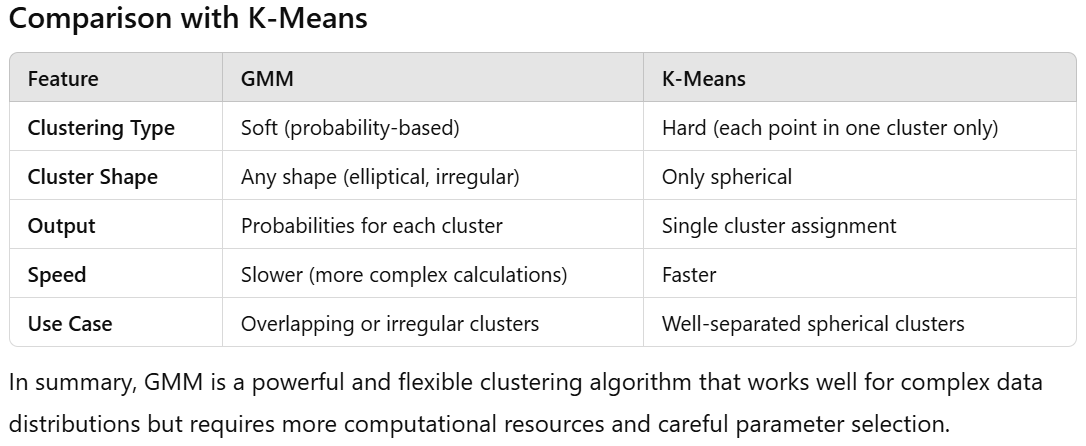

# Implementation and Comparision of K Means VS GMM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

from sklearn.datasets import make_blobs

# Step -1 Generate synthetic data
np.random.seed(42)
# X means the data of that data point
# Y_true means the actual cluster to which that data point should belong

X , Y_true= make_blobs(n_samples=500 , centers=3 , cluster_std=[1.0 , 2.5 , 0.5] , random_state=42)

In [ ]:
X

array([[-6.30499053e+00, -7.23169781e+00],
       [-2.10233777e+00,  1.83743252e+00],
       [ 1.01143862e+01, -4.75760294e-02],
       [-2.90130578e+00,  7.55077118e+00],
       [ 7.64291364e+00,  9.52981251e-01],
       [ 6.71571838e+00, -1.67039881e-01],
       [-5.59958492e+00, -6.92813954e+00],
       [ 5.31602090e+00,  1.84757441e+00],
       [ 1.97082776e+00,  1.61722097e+00],
       [-7.19203648e+00, -6.86706407e+00],
       [ 3.02344663e+00, -7.30700325e-01],
       [-1.35060204e+00,  8.19360381e+00],
       [-3.76164248e-01,  7.06219833e+00],
       [-1.93830711e+00,  1.01498518e+01],
       [ 5.36431598e+00,  7.16167168e+00],
       [ 7.28594005e+00, -2.42367903e+00],
       [-2.58120774e+00,  1.00178190e+01],
       [-7.44098820e+00, -6.68890472e+00],
       [-6.83848520e+00, -6.34736941e+00],
       [-3.61553260e+00,  7.81807950e+00],
       [ 1.14345990e+00,  3.38059278e+00],
       [-2.30033403e+00,  7.05461600e+00],
       [ 6.08127124e+00,  2.75129507e+00],
       [-6.

In [ ]:
Y_true  # Actual correct cluster

array([2, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 2, 2, 0, 1, 0,
       1, 2, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 1, 1, 1, 2, 2, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 0, 2, 2, 1, 0, 0, 2, 1, 2, 2, 0, 1, 2, 1, 2,
       1, 2, 0, 1, 1, 1, 1, 2, 0, 2, 0, 1, 0, 0, 2, 0, 1, 0, 2, 2, 2, 2,
       1, 0, 2, 1, 0, 1, 1, 2, 0, 0, 0, 2, 1, 0, 0, 2, 2, 0, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 0, 0, 1, 1, 2, 1, 0, 1, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 0, 2, 2, 1, 1, 2, 2, 2, 0, 0, 0, 1, 2, 1, 1,
       0, 2, 0, 2, 1, 1, 2, 2, 0, 0, 2, 0, 0, 1, 2, 2, 2, 0, 0, 2, 2, 0,
       0, 1, 1, 1, 0, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 0, 1, 0, 0,
       2, 1, 0, 0, 2, 2, 1, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 0, 2, 0, 1,
       1, 0, 2, 0, 1, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 0, 1, 0, 1, 1, 1,
       0, 0, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 2, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 2, 0,
       1, 2, 1, 1, 2, 0, 0, 0, 2, 0, 2, 1, 1, 0, 1,

In [ ]:
# Ask Kmeans to do the clustering on data "X"
kmeans = KMeans(n_clusters=3 , random_state=42)
kmeans_labels = kmeans.fit_predict(X)
kmeans_labels

array([1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 2, 2, 2, 0, 0, 2, 1, 1, 2, 0, 2,
       0, 1, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 2, 1, 1, 0, 2, 2, 1, 0, 1, 1, 2, 0, 1, 0, 1,
       0, 1, 2, 0, 0, 0, 0, 1, 2, 1, 2, 0, 2, 2, 1, 2, 0, 2, 1, 1, 1, 1,
       0, 2, 1, 0, 2, 0, 0, 1, 2, 2, 2, 1, 0, 2, 2, 1, 1, 2, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 2, 2, 0, 0, 1, 0, 2, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 2, 0, 1, 0, 2,
       2, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 2, 2, 0, 1, 1, 1, 2, 2, 1, 1, 2,
       2, 0, 0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 2,
       1, 0, 2, 2, 1, 1, 0, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2, 1, 2, 0,
       2, 2, 1, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0,
       2, 2, 1, 1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2,
       0, 0, 0, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 1, 2,
       0, 1, 0, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 2, 0,

In [ ]:
# Ask GMM to do the clustering on data "X"
gmm = GaussianMixture(n_components=3 , random_state=42)
gmm_labels = gmm.fit_predict(X)
gmm_labels

array([1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 2, 2, 2, 0, 0, 2, 1, 1, 2, 0, 2,
       0, 1, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 2, 1, 1, 0, 2, 2, 1, 0, 1, 1, 2, 0, 1, 0, 1,
       0, 1, 2, 0, 0, 0, 0, 1, 2, 1, 2, 0, 2, 2, 1, 2, 0, 2, 1, 1, 1, 1,
       0, 2, 1, 0, 2, 0, 0, 1, 2, 2, 2, 1, 0, 2, 2, 1, 1, 2, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 2, 2, 0, 0, 1, 0, 2, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 2, 0, 1, 0, 0,
       2, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 2, 2, 0, 1, 1, 1, 2, 2, 1, 1, 2,
       2, 0, 0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 2,
       1, 0, 2, 2, 1, 1, 0, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2, 1, 2, 0,
       0, 2, 1, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0,
       2, 2, 1, 1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2,
       0, 0, 0, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 1, 2,
       0, 1, 0, 0, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2, 0,

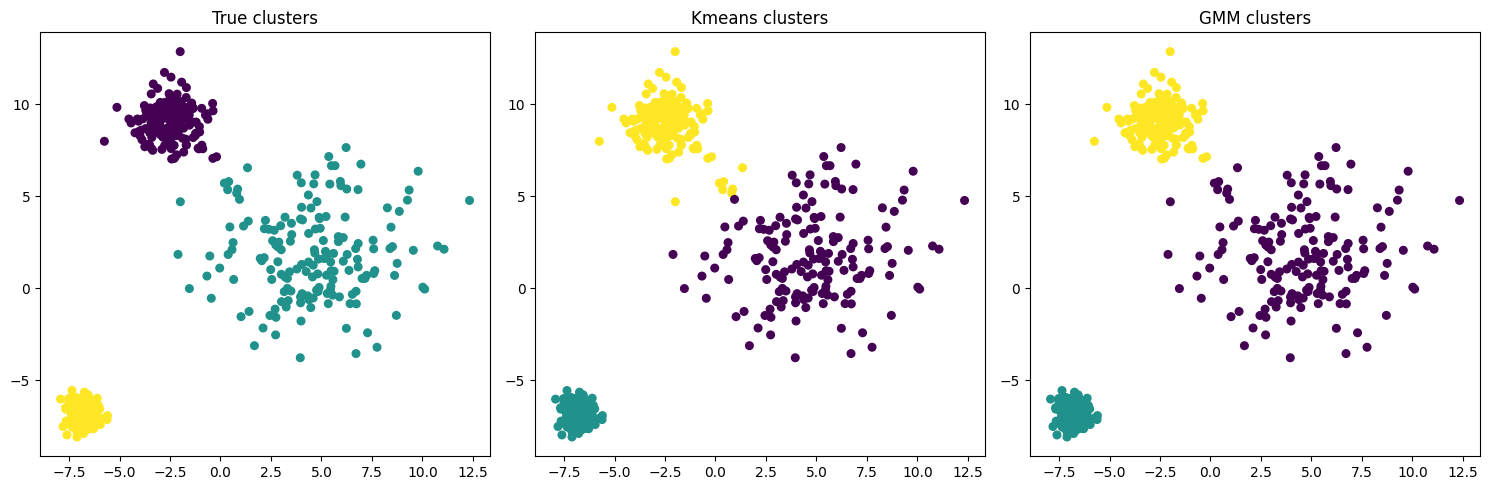

In [ ]:
# Compare the output by visual comparision
fig , axes = plt.subplots(1,3 , figsize=(15,5))

# Drawing a 1st scatter plot of X data and actual cluster
axes[0].scatter(X[:,0], X[:,1] , c=Y_true , cmap="viridis" , s=30)   #cmap is color combination , s is the sie of scatter plot data points
axes[0].set_title("True clusters")

# Drawing a 2nd scatter plot of X data and cluster assigned by KMeans
axes[1].scatter(X[:,0], X[:,1] , c=kmeans_labels , cmap="viridis" , s=30)
axes[1].set_title("Kmeans clusters")


# Drawing a 3rd scatter plot of X data and cluster assigned by GMM
axes[2].scatter(X[:,0], X[:,1] , c=gmm_labels , cmap="viridis" , s=30)
axes[2].set_title("GMM clusters")


plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_gmm = silhouette_score(X , gmm_labels)
silhouette_kmeans = silhouette_score(X , kmeans_labels)

print(silhouette_gmm)
print(silhouette_kmeans)

0.7682125448805002
0.773673050330578
